In [34]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

In [35]:
train = pd.read_csv('Datasets/bearings/NB.csv')
train['Fault'] = 0

test = pd.read_csv('Datasets/bearings/IR - 7.csv')
test['Fault'] = 1

dataset = train.append(test)
dataset

,DE,FE,Fault
0,0.064254,0.038625,0
1,0.063002,0.096769,0
2,-0.004381,0.127382,0
3,-0.035882,0.144640,0
4,-0.023991,0.086702,0
...,...,...,...
38601,-0.180790,-0.283733,1
38602,0.019817,0.072115,1
38603,0.009259,0.325440,1
38604,-0.105745,0.268735,1


In [36]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79141 entries, 0 to 38605
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DE      79141 non-null  float64
 1   FE      79141 non-null  float64
 2   Fault   79141 non-null  int64  
dtypes: float64(2), int64(1)
memory usage: 2.4 MB


In [37]:
dataset.describe()

,DE,FE,Fault
count,79141.000000,79141.000000,79141.000000
mean,0.009206,0.033634,0.487813
std,0.213074,0.168133,0.499855
min,-1.389633,-0.866196,0.000000
25%,-0.063210,-0.040885,0.000000
50%,0.013157,0.031229,0.000000
75%,0.081151,0.107042,1.000000
max,1.639620,0.912629,1.000000



--- Distribution of DE and FE ---


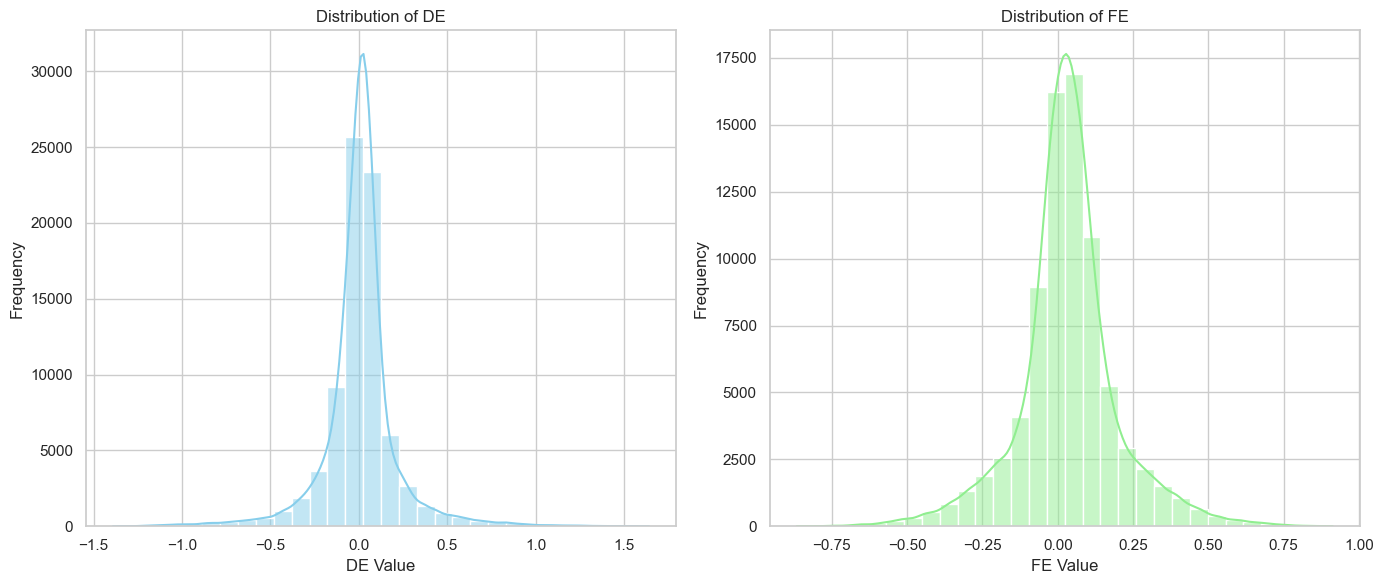

In [38]:
print("\n--- Distribution of DE and FE ---")
plt.figure(figsize=(14, 6))

# Distribution of DE
plt.subplot(1, 2, 1)
sns.histplot(dataset['DE'], kde=True, bins=30, color='skyblue')
plt.title("Distribution of DE")
plt.xlabel("DE Value")
plt.ylabel("Frequency")

# Distribution of FE
plt.subplot(1, 2, 2)
sns.histplot(dataset['FE'], kde=True, bins=30, color='lightgreen')
plt.title("Distribution of FE")
plt.xlabel("FE Value")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()
 


--- Failure Rate Distribution ---


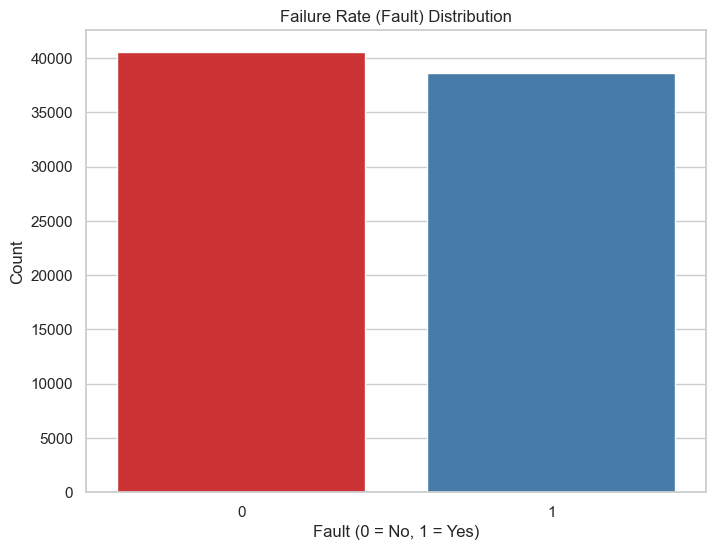

In [39]:
# Failure Rate Analysis
# ------------------------------
print("\n--- Failure Rate Distribution ---")
plt.figure(figsize=(8, 6))
sns.countplot(x='Fault', data=dataset, palette='Set1')
plt.title("Failure Rate (Fault) Distribution")
plt.xlabel("Fault (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()


In [40]:
# Sensor Z-Score for Outlier Detection
# --------------------------------------------
print("\n--- Outlier Detection Using Z-Score ---")
dataset['DE_zscore'] = zscore(dataset['DE'])
dataset['FE_zscore'] = zscore(dataset['FE'])
outliers_DE = dataset[np.abs(dataset['DE_zscore']) > 3]  # z-score > 3 implies outliers in DE
outliers_FE = dataset[np.abs(dataset['FE_zscore']) > 3]  # z-score > 3 implies outliers in FE
print(f"Number of outliers in DE: {len(outliers_DE)}")
print(f"Number of outliers in FE: {len(outliers_FE)}")



--- Outlier Detection Using Z-Score ---
Number of outliers in DE: 2033
Number of outliers in FE: 1259


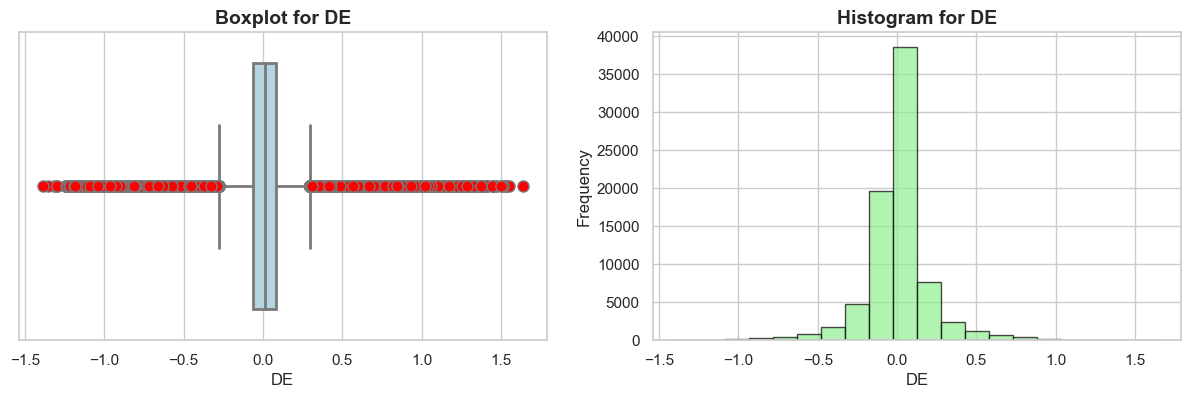

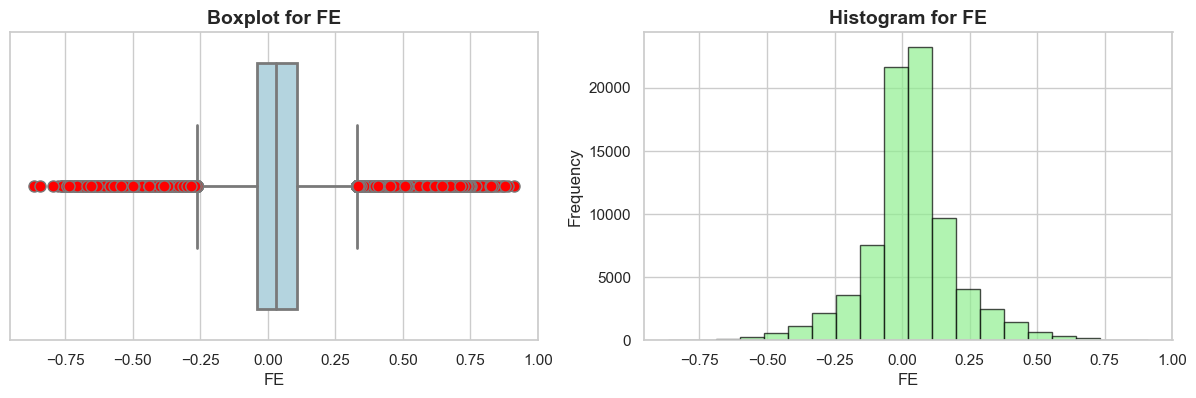

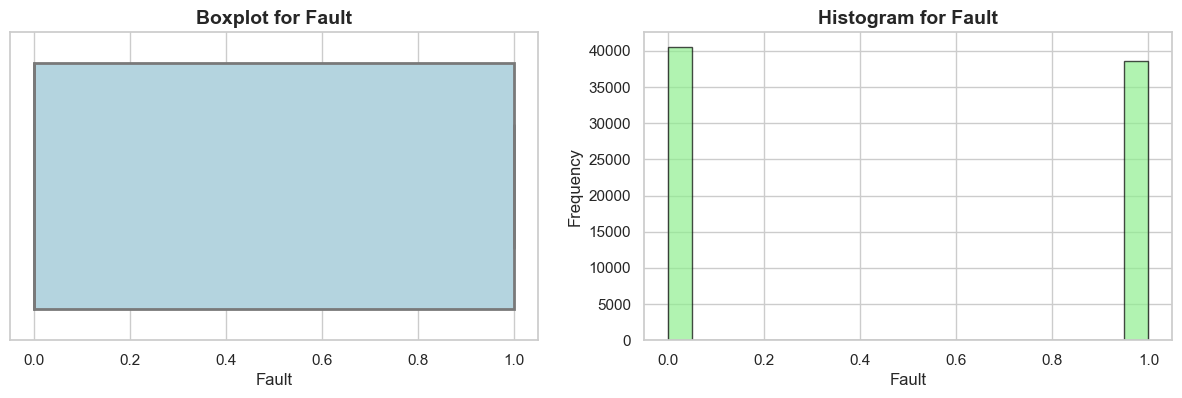

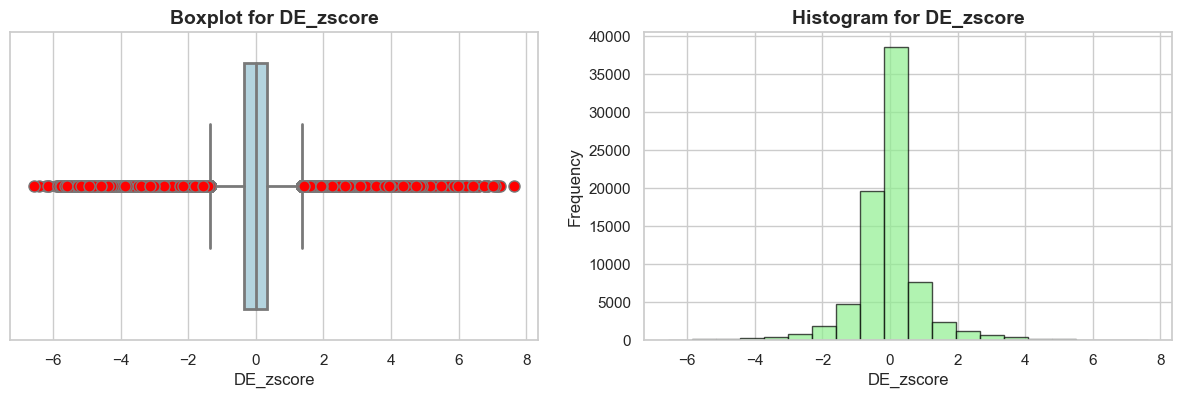

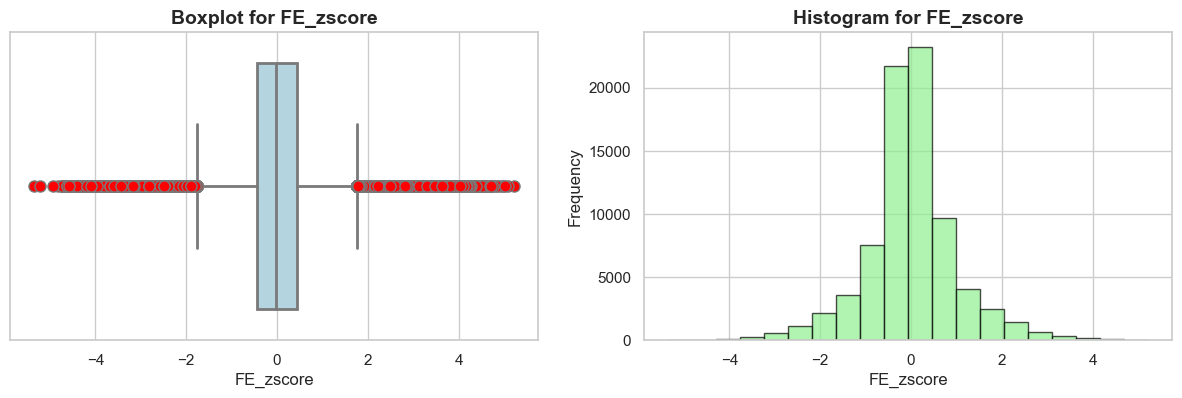

In [41]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set a style for the plots
sns.set(style="whitegrid")

# Loop through each feature (column) in the dataset
for (columnName, columnData) in dataset.iteritems():
    # Creating a figure for Boxplot and Histogram
    fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(15, 4))
    
    # Feature values
    x = columnData

    # Boxplot with Seaborn styling
    sns.boxplot(x=x, ax=ax1, color='lightblue', linewidth=2, fliersize=5, 
                flierprops=dict(marker='o', markerfacecolor='red', markersize=8))
    ax1.set_title(f'Boxplot for {columnName}', fontsize=14, fontweight='bold')
    ax1.set_xlabel(columnName, fontsize=12)

    # Histogram with colors
    ax2.hist(x, bins=20, color='lightgreen', edgecolor='black', alpha=0.7)
    ax2.set_title(f'Histogram for {columnName}', fontsize=14, fontweight='bold')
    ax2.set_xlabel(columnName, fontsize=12)
    ax2.set_ylabel('Frequency', fontsize=12)


    # Display the plots
    plt.show()


In [42]:
# Checking for null values
#Drive End, Fan End, Case University Reserve
features = ['DE', 'FE', 'Fault']
N_null = sum(dataset[features].isnull().sum())
print("The dataset contains {} null values".format(N_null))

# Removing duplicates if there exist
N_dupli = sum(dataset.duplicated(keep='first'))
dataset = dataset.drop_duplicates(keep='first').reset_index(drop=True)
print("The dataset contains {} duplicates".format(N_dupli))

# Number of samples in the dataset
N = dataset.shape[0]

The dataset contains 0 null values
The dataset contains 798 duplicates


In [43]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78343 entries, 0 to 78342
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   DE         78343 non-null  float64
 1   FE         78343 non-null  float64
 2   Fault      78343 non-null  int64  
 3   DE_zscore  78343 non-null  float64
 4   FE_zscore  78343 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 3.0 MB


In [44]:
dataset.corr() # 1- perfect positive correlation, 0- No corr, -1 - perfect negative corr

,DE,FE,Fault,DE_zscore,FE_zscore
DE,1.000000,0.090798,-0.020786,1.000000,0.090798
FE,0.090798,1.000000,0.006114,0.090798,1.000000
Fault,-0.020786,0.006114,1.000000,-0.020786,0.006114
DE_zscore,1.000000,0.090798,-0.020786,1.000000,0.090798
FE_zscore,0.090798,1.000000,0.006114,0.090798,1.000000


<AxesSubplot:>

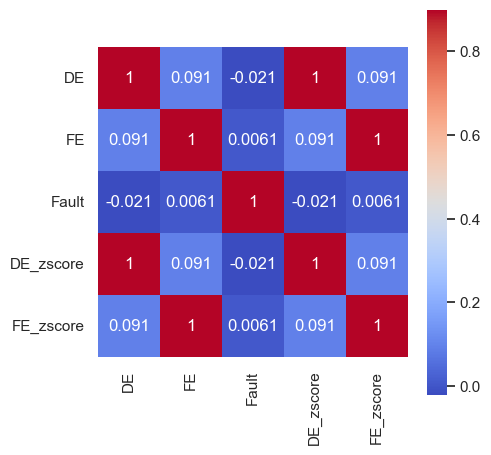

In [45]:
# make correlation matrix to heatmap
f, ax = plt.subplots(figsize=(5, 5))  #This line uses the subplots function from the matplotlib.pyplot library to create a new figure object (f) and an axes object (ax)
sns.heatmap(dataset.corr(), cmap='coolwarm', vmax = .9, square = True, annot=True)

In [46]:
def plot_feature(data, dataName):
    x = list(range(len(data.index)))
    y = data

    # plot the humidity data
    fig = plt.subplots(figsize=(18, 6))
    plt.plot(x,y)
    plt.ylabel(dataName)
    plt.xlabel('Index')

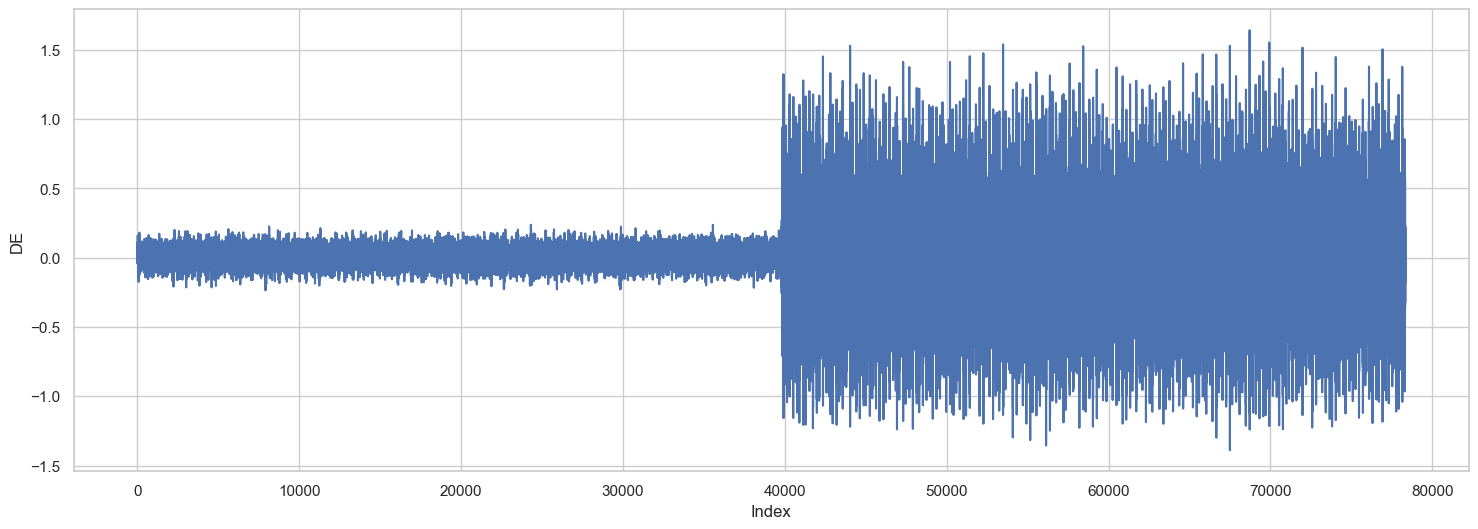

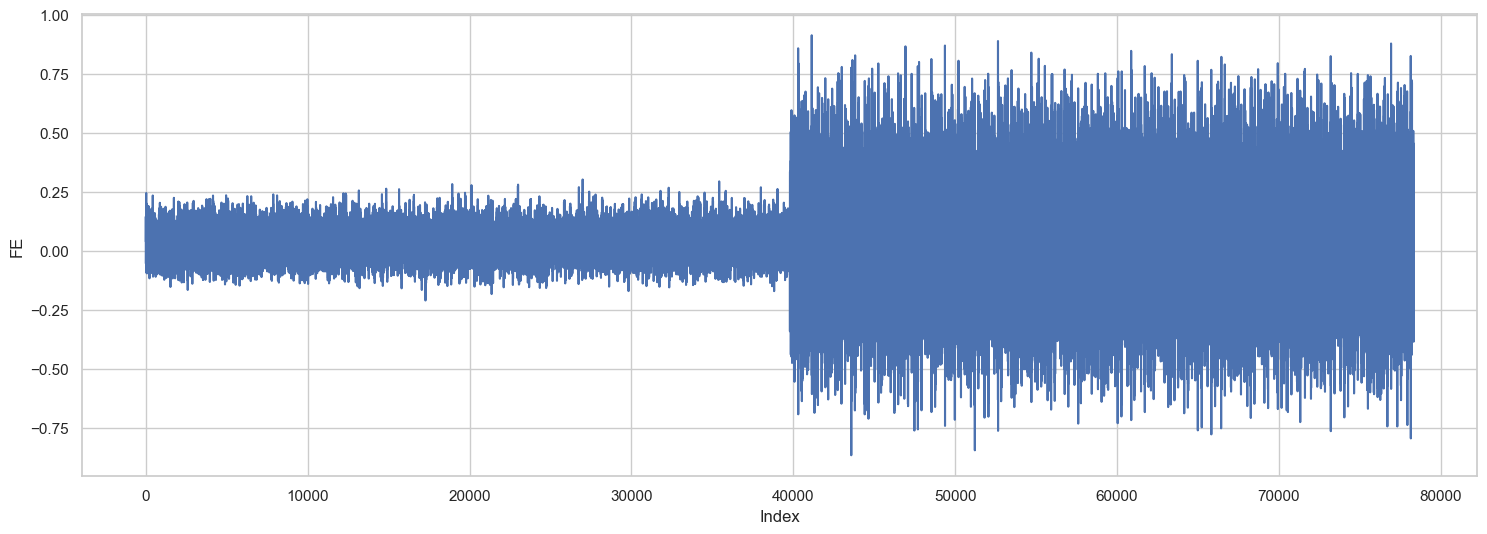

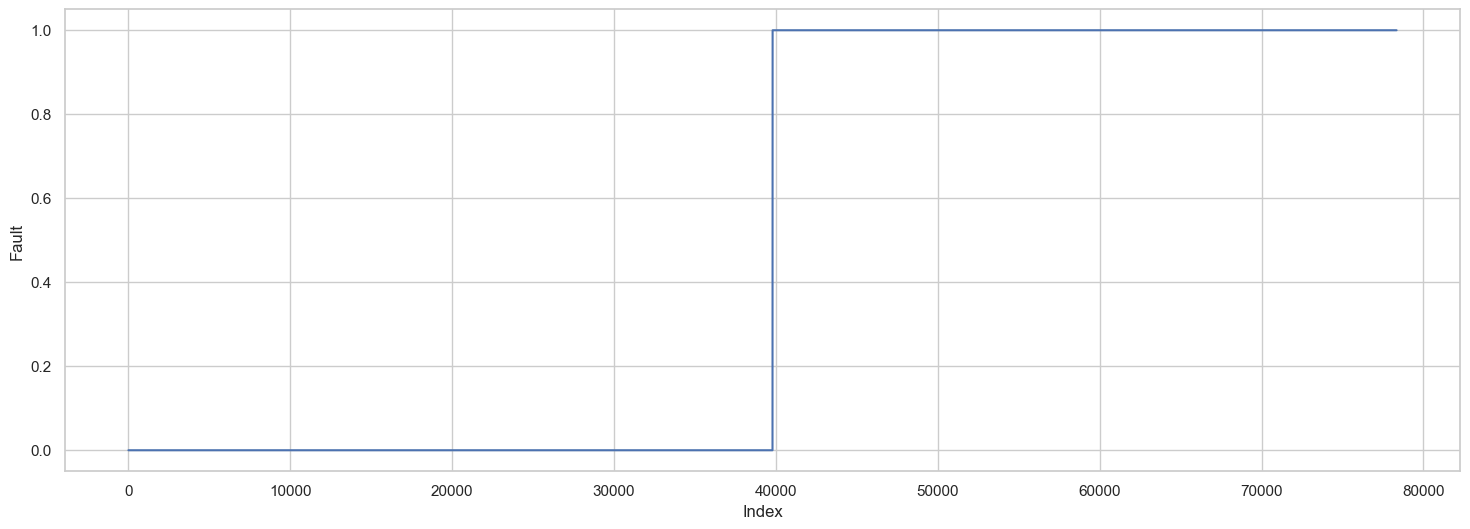

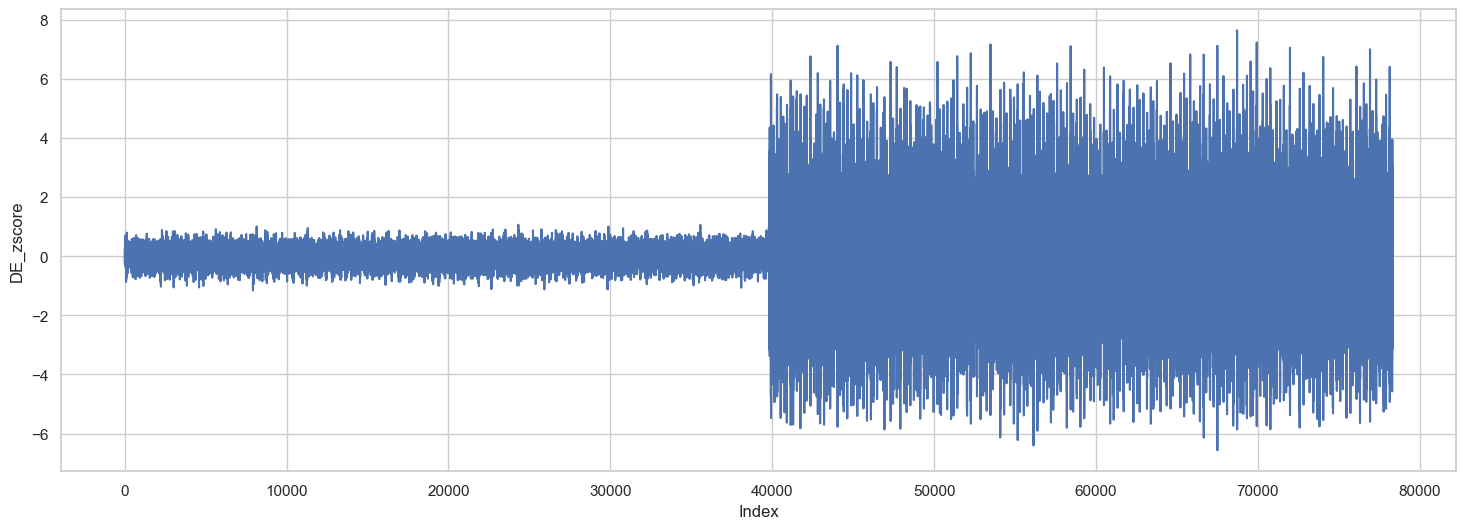

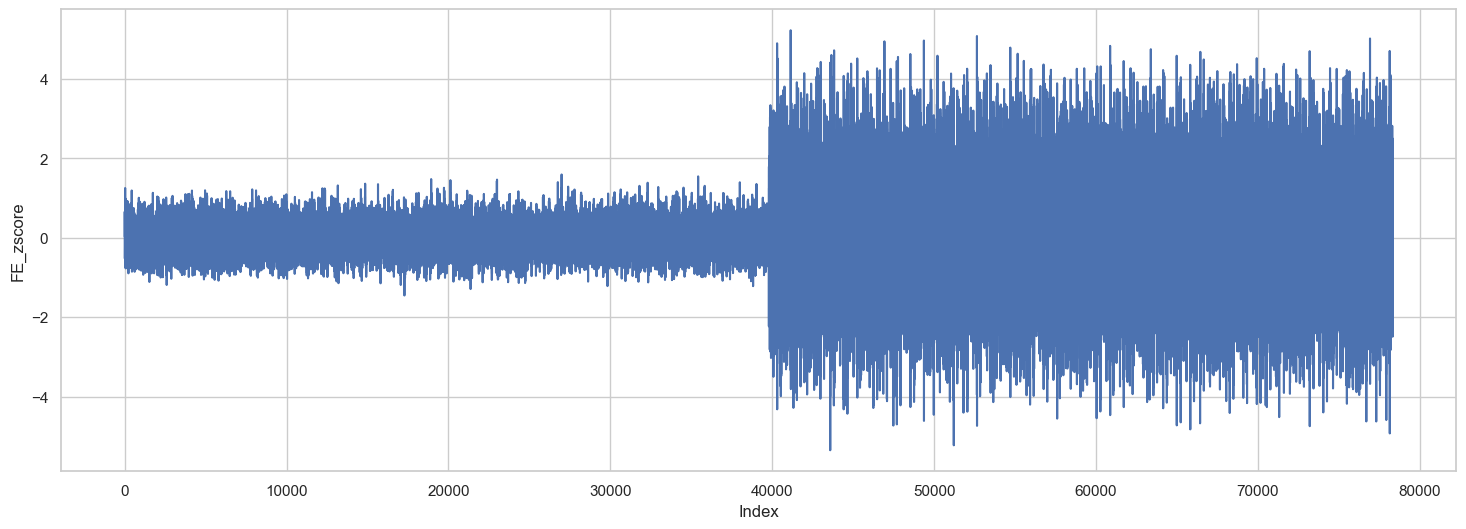

In [47]:
for (columnName, columnData) in dataset.iteritems():
    plot_feature(columnData, columnName)

In [48]:
# Select features and the target variable
X = dataset.drop('Fault', axis=1)  # Features (assume all other columns are features)
y = dataset['Fault']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
print("Training features shape:", X_train.shape)
print("Testing features shape:", X_test.shape)
print("Training labels shape:", y_train.shape)
print("Testing labels shape:", y_test.shape)


Training features shape: (62674, 4)
Testing features shape: (15669, 4)
Training labels shape: (62674,)
Testing labels shape: (15669,)


In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score, f1_score, precision_score, r2_score

log = LogisticRegression(random_state = 0)
log.fit(X_train, y_train)

# Logistic Regression
y_pred_log = log.predict(X_test)
log_recall = recall_score(y_test, y_pred_log)
log_f1 = f1_score(y_test, y_pred_log)
log_precision = precision_score(y_test, y_pred_log)
log_r2 = r2_score(y_test, y_pred_log)

print('[1]Logistic Regression:-  Training Accurancy: ', log.score(X_train, y_train),', Testing Accurancy: ' ,log.score(X_test, y_test),
      '\nRecall: ', log_recall, '\nF1 score: ', log_f1, '\nPrecision: ', log_precision, '\nR-squared: ', log_r2)

# KNeighbors
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p=2)
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)
knn_recall = recall_score(y_test, y_pred_knn)
knn_f1 = f1_score(y_test, y_pred_knn)
knn_precision = precision_score(y_test, y_pred_knn)
knn_r2 = r2_score(y_test, y_pred_knn)

print('[2]KNeighbors:-  Training Accurancy: ', knn.score(X_train, y_train),', Testing Accurancy: ' , knn.score(X_test, y_test),
      '\nRecall: ', knn_recall, '\nF1 score: ', knn_f1, '\nPrecision: ', knn_precision, '\nR-squared: ', knn_r2)

# SVC
from sklearn.svm import SVC
svc = SVC(random_state=0)
svc.fit(X_train, y_train)

y_pred_svc = svc.predict(X_test)
svc_recall = recall_score(y_test, y_pred_svc)
svc_f1 = f1_score(y_test, y_pred_svc)
svc_precision = precision_score(y_test, y_pred_svc)
svc_r2 = r2_score(y_test, y_pred_svc)

print('[3]SVC:-  Training Accurancy: ', svc.score(X_train, y_train),', Testing Accurancy: ' , svc.score(X_test, y_test),
      '\nRecall: ', svc_recall, '\nF1 score: ', svc_f1, '\nPrecision: ', svc_precision, '\nR-squared: ', svc_r2)

# GaussianNB
from sklearn.naive_bayes import GaussianNB
gauss = GaussianNB()
gauss.fit(X_train, y_train)

y_pred_gauss = gauss.predict(X_test)
gauss_recall = recall_score(y_test, y_pred_gauss)
gauss_f1 = f1_score(y_test, y_pred_gauss)
gauss_precision = precision_score(y_test, y_pred_gauss)
gauss_r2 = r2_score(y_test, y_pred_gauss)

print('[4]GaussianNB:-  Training Accurancy: ', gauss.score(X_train, y_train),', Testing Accurancy: ' , gauss.score(X_test, y_test),
      '\nRecall: ', gauss_recall, '\nF1 score: ', gauss_f1, '\nPrecision: ', gauss_precision, '\nR-squared: ', gauss_r2)

# Decision Tree
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0, max_depth = 5)
tree.fit(X_train, y_train)

y_pred_tree = tree.predict(X_test)
tree_recall = recall_score(y_test, y_pred_tree)
tree_f1 = f1_score(y_test, y_pred_tree)
tree_precision = precision_score(y_test, y_pred_tree)
tree_r2 = r2_score(y_test, y_pred_tree)

print('[5]Decision Tree:-  Training Accurancy: ', tree.score(X_train, y_train),', Testing Accurancy: ' , tree.score(X_test, y_test),
      '\nRecall: ', tree_recall, '\nF1 score: ', tree_f1, '\nPrecision: ', tree_precision, '\nR-squared: ', tree_r2)

# RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
forest.fit(X_train, y_train)

y_pred_forest = forest.predict(X_test)
forest_recall = recall_score(y_test, y_pred_forest)
forest_f1 = f1_score(y_test, y_pred_forest)
forest_precision = precision_score(y_test, y_pred_forest)
forest_r2 = r2_score(y_test, y_pred_forest)

print('[6]RandomForestClassifier:-  Training Accurancy: ', forest.score(X_train, y_train),', Testing Accurancy: ' , forest.score(X_test, y_test),
      '\nRecall: ', forest_recall, '\nF1 score: ', forest_f1, '\nPrecision: ', forest_precision, '\nR-squared: ', forest_r2)

[1]Logistic Regression:-  Training Accurancy:  0.6203050706832179 , Testing Accurancy:  0.6125470674580382 
Recall:  0.2284029735965137 
F1 score:  0.36990140114167097 
Precision:  0.972176759410802 
R-squared:  -0.5498384006317278
[2]KNeighbors:-  Training Accurancy:  0.8885662316111944 , Testing Accurancy:  0.8472142446869615 
Recall:  0.7921045885670341 
F1 score:  0.837738918259455 
Precision:  0.8889528193325662 
R-squared:  0.38884646168467196
[3]SVC:-  Training Accurancy:  0.8675367776111306 , Testing Accurancy:  0.8611908864637182 
Recall:  0.7528838759292489 
F1 score:  0.8437836673130791 
Precision:  0.9596471164842346 
R-squared:  0.4447539908789313
[4]GaussianNB:-  Training Accurancy:  0.8649838848645371 , Testing Accurancy:  0.8592124577190631 
Recall:  0.7621122789028454 
F1 score:  0.8435239040998724 
Precision:  0.9444091486658196 
R-squared:  0.43684013971444713
[5]Decision Tree:-  Training Accurancy:  0.8591760538660369 , Testing Accurancy:  0.8527666092284127 
Recall

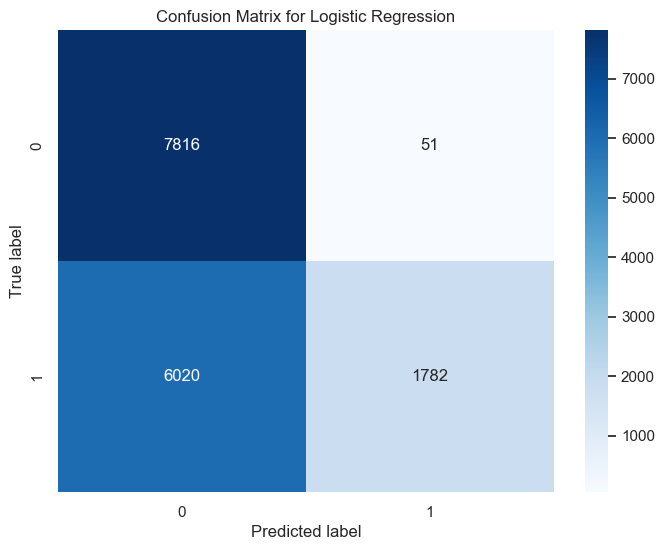

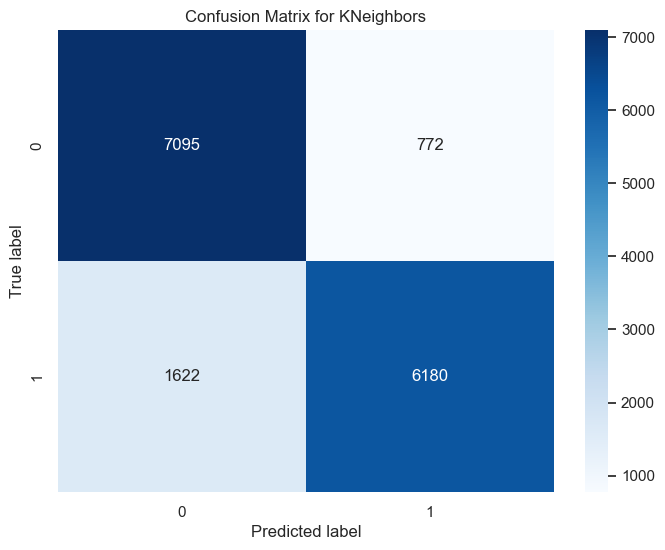

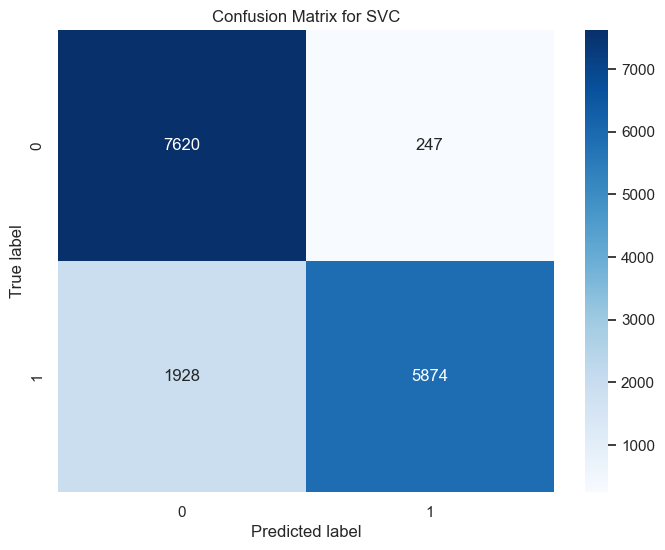

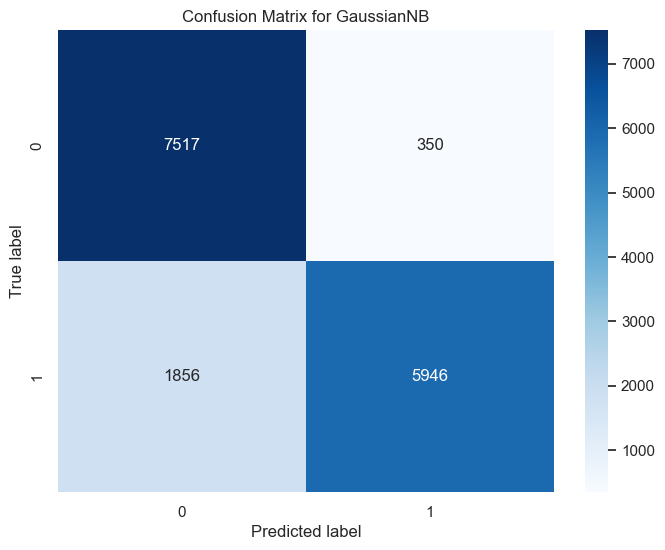

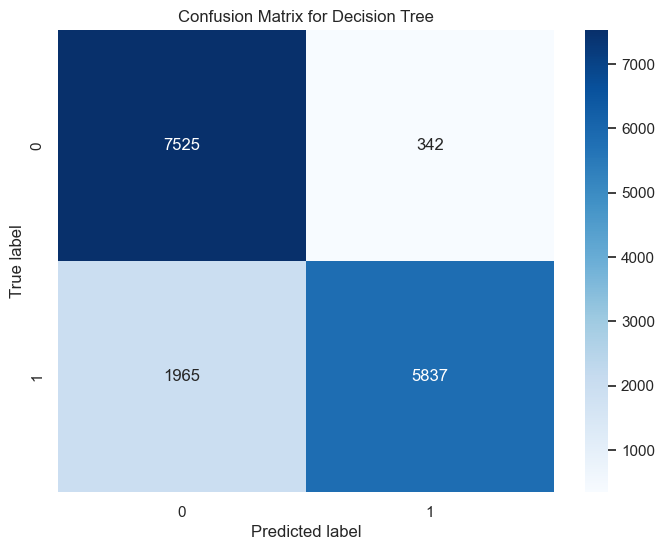

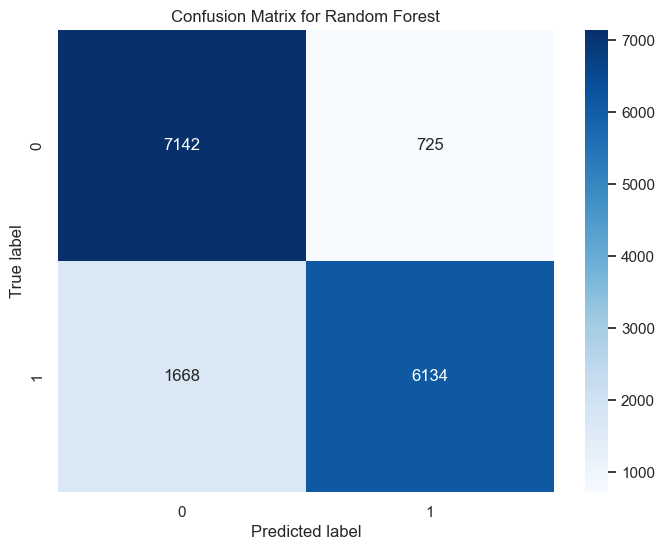

In [51]:
from sklearn.metrics import confusion_matrix

# Logistic Regression
log_conf_matrix = confusion_matrix(y_test, y_pred_log)

plt.figure(figsize=(8, 6))
sns.heatmap(log_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=log.classes_, yticklabels=log.classes_)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

# KNeighbors
knn_conf_matrix = confusion_matrix(y_test, y_pred_knn)

plt.figure(figsize=(8, 6))
sns.heatmap(knn_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=knn.classes_, yticklabels=knn.classes_)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for KNeighbors')
plt.show()

# SVC
svc_conf_matrix = confusion_matrix(y_test, y_pred_svc)

plt.figure(figsize=(8, 6))
sns.heatmap(svc_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=svc.classes_, yticklabels=svc.classes_)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for SVC')
plt.show()

# GaussianNB
gnb_conf_matrix = confusion_matrix(y_test, y_pred_gauss)

plt.figure(figsize=(8, 6))
sns.heatmap(gnb_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=gauss.classes_, yticklabels=gauss.classes_)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for GaussianNB')
plt.show()

# Decision Tree
tree_conf_matrix = confusion_matrix(y_test, y_pred_tree)

plt.figure(figsize=(8, 6))
sns.heatmap(tree_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=tree.classes_, yticklabels=tree.classes_)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Decision Tree')
plt.show()

# Random Forest
forest_conf_matrix = confusion_matrix(y_test, y_pred_forest)

plt.figure(figsize=(8, 6))
sns.heatmap(forest_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=forest.classes_, yticklabels=forest.classes_)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest')
plt.show()